In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data", header= None)

In [24]:
df.columns= ['white_king_file','white_king_rank','white_rook_file','white_rook_rank','black_king_file','black_king_rank','result']

In [4]:
df.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [5]:
df.describe()

,white_king_rank,white_rook_rank,black_king_rank
count,28056.000000,28056.000000,28056.000000
mean,1.854006,4.512404,4.451811
std,0.926414,2.282723,2.248387
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


In [6]:
df['result'].value_counts()

fourteen    4553
thirteen    4194
twelve      3597
eleven      2854
draw        2796
fifteen     2166
ten         1985
nine        1712
eight       1433
seven        683
six          592
five         471
sixteen      390
two          246
four         198
three         81
one           78
zero          27
Name: result, dtype: int64

In [7]:
def convert_to_num(val):
    if isinstance(val, str) and val.isalpha():
        num_value = ord(val.upper()) - 64
        return num_value
    else:
        return val

In [8]:
df['white_king_file'] = df['white_king_file'].apply(convert_to_num)
df['white_rook_file'] = df['white_rook_file'].apply(convert_to_num)
df['black_king_file'] = df['black_king_file'].apply(convert_to_num)

In [10]:
mapping = {'draw': -1, 'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
           'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11,
           'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fifteen': 15, 'sixteen': 16}

df['result'] = df['result'].map(mapping)

In [33]:
df=pd.read_csv('modified_file.csv',header=None)

In [34]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3)
    samples.append((X_train, X_test, y_train, y_test))

In [35]:
samples

[(      0  1  2  3  4  5
  713   2  2  7  7  6  6
  500   2  1  7  3  8  4
  3945  3  2  4  3  5  2
  292   2  1  3  6  2  7
  2838  3  2  3  5  1  1
  ...  .. .. .. .. .. ..
  256   2  1  2  7  1  7
  2512  4  3  6  4  7  5
  35    1  1  4  4  4  3
  2112  4  2  4  5  3  5
  3503  4  1  5  2  7  1
  
  [2815 rows x 6 columns],
        0  1  2  3  4  5
  2375  4  3  2  4  3  5
  2559  4  3  7  3  8  2
  3118  4  3  3  5  4  1
  3741  4  3  3  6  1  1
  1048  3  1  7  3  8  3
  ...  .. .. .. .. .. ..
  3632  4  2  6  2  2  2
  2752  4  4  7  6  7  7
  1044  3  1  7  3  6  4
  3252  4  1  6  3  1  1
  3729  4  3  3  3  1  2
  
  [1207 rows x 6 columns],
  713    -1
  500    -1
  3945    6
  292    -1
  2838    1
         ..
  256    -1
  2512   -1
  35     -1
  2112   -1
  3503    5
  Name: 6, Length: 2815, dtype: int64,
  2375   -1
  2559   -1
  3118    2
  3741    5
  1048   -1
         ..
  3632    5
  2752   -1
  1044   -1
  3252    4
  3729    5
  Name: 6, Length: 1207, dtype: int64

In [36]:
def fitnessfunction(X_train, X_test, y_train, y_test, kernel, c, gamma):
    model= svm.SVC( C= c, kernel= kernel, gamma=gamma)
    model.fit(X_train, y_train)
    print("fit")
    predicted = model.predict(X_test)
        
    # Model Evaluation Accuracy
    accuracy = round(np.mean(y_test == predicted) * 100, 2)
    return accuracy 
    

In [37]:
nsamples = 10
accuracies = []
params= []
iteration= 100

kernelList = ['rbf', 'sigmoid']
df_sample= pd.DataFrame(columns=['sample#', 'best accuracy', 'c', 'gamma', 'kernel'])

for i in range(nsamples):
    bestC = 0 
    bestGamma = 0 
    bestAccuracy=0
    X_train, X_test, y_train, y_test = samples[i]
    
    print("Iterating on sample ", i+1)
    for j in range(1, iteration+1):
        print("iteration ",j)
        kernel= np.random.choice(kernelList)
        C = np.random.uniform(0,10)
        gamma = np.random.uniform(0, 10)
        print(kernel , C, gamma)
        accuracy= fitnessfunction(X_train, X_test, y_train, y_test, kernel, C, gamma)
        if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestC= C
                bestGamma= gamma
                bestKernel= kernel

                    
    accuracies.append(bestAccuracy)
    params.append([bestC, bestGamma, bestKernel])

    df_sample.loc[len(df_sample.index)] = [i+1, bestAccuracy, bestC, bestGamma, bestKernel]
    #print(f"Sample {i+1}: Best accuracy = {bestAccuracy}, Best params = {bestNu, bestEpsilon, bestKernel}")
print("Done iterating!\n")

Iterating on sample  1
iteration  1
rbf 4.213894995075355 0.1872800637351535
fit
iteration  2
sigmoid 8.275415731112304 0.08942214024307504
fit
iteration  3
sigmoid 6.757069289166999 2.0602025500883148
fit
iteration  4
rbf 2.6320271520585825 5.963475134254239
fit
iteration  5
sigmoid 2.748438535168496 9.06906106189175
fit
iteration  6
sigmoid 5.370920998014147 6.221158277754258
fit
iteration  7
sigmoid 6.172124279615336 8.092356495526445
fit
iteration  8
rbf 1.742905288008052 3.52760124423198
fit
iteration  9
rbf 5.222119730500032 1.1887514962361634
fit
iteration  10
sigmoid 6.68637982411669 4.45180739798379
fit
iteration  11
sigmoid 8.577141007962599 6.913061168987871
fit
iteration  12
sigmoid 8.025057896825768 0.5997997303698477
fit
iteration  13
sigmoid 8.429752361583374 0.5884192941584754
fit
iteration  14
sigmoid 2.4218585411014204 9.466564212848116
fit
iteration  15
sigmoid 5.787425216197546 7.408784121436328
fit
iteration  16
sigmoid 1.4371443570775289 2.3347806604728882
fit
ite

In [38]:
print(df_sample)

   sample#  best accuracy         c     gamma kernel
0        1          96.44  8.437685  0.470508    rbf
1        2          95.69  8.948798  0.320246    rbf
2        3          94.86  3.412619  0.579945    rbf
3        4          95.86  5.511720  0.662602    rbf
4        5          95.19  9.126831  0.582011    rbf
5        6          94.03  8.455431  0.957023    rbf
6        7          93.95  4.984564  0.180878    rbf
7        8          94.70  5.543882  0.366301    rbf
8        9          93.62  8.794756  0.727077    rbf
9       10          94.53  1.866425  0.629930    rbf


In [39]:
X_train, X_test, y_train, y_test = samples[df_sample['best accuracy'].idxmax()]


In [40]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=df_sample['kernel'].iloc[df_sample['best accuracy'].idxmax()], 
                                                        C=df_sample['c'].iloc[df_sample['best accuracy'].idxmax()],
                                                        gamma=df_sample['gamma'].iloc[df_sample['best accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [41]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

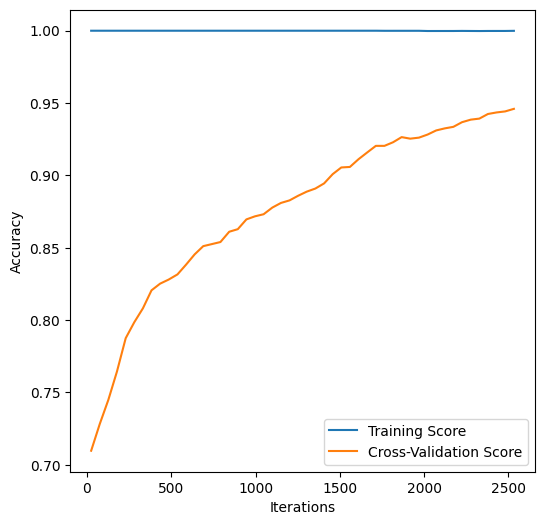

In [42]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()